In [1]:
%matplotlib inline

import json

from pitchfilter.pitchfilter import PitchPostFilter
from tonic_identifier.tonic_identifier import TonicLastNote
from note_model.NoteModel import NoteModel

In [2]:
# inputs; pitch track and makam of the recording
rec_makam = "nihavent"
pitch = json.load(open("sample_data/feda89e3-a50d-4ff8-87d4-c1e531cc1233.json", 'r'))['pitch']

# Extra: Postprocess the pitch track to get rid of spurious pitch estimations and correct octave errors
flt = PitchPostFilter()
pitch = flt.run(pitch)


In [3]:
# run tonic identification using last note detection
tonic_identifier = TonicLastNote()
tonic, pitch, pitch_chunks, distribution, sp = tonic_identifier.identify(pitch)
tonic_hz = tonic["value"]


/home/hsercanatli/Documents/master/local/lib/python2.7/site-packages/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


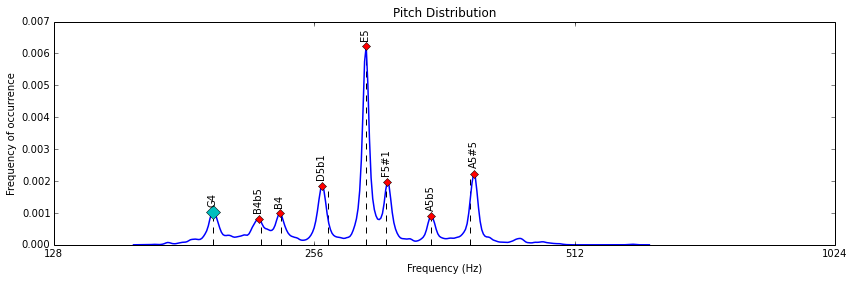

In [4]:
# Obtain the the stable notes
model = NoteModel()
stablenotes, theo_peaks = model.calculate_notes(distribution, tonic_hz, rec_makam)
model.plot(distribution, stablenotes, theo_peaks)
